In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier

In [8]:
data = pd.read_csv('./Data/heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [9]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
data[(data['HeartDisease']== 1)].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0
mean,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213,1.0
std,8.727056,19.828685,126.391398,0.472332,23.386923,1.151872,0.0
min,31.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,1.0
25%,51.000000,120.000000,0.000000,0.000000,112.000000,0.000000,1.0
50%,57.000000,132.000000,217.000000,0.000000,126.000000,1.200000,1.0
75%,62.000000,145.000000,267.000000,1.000000,144.250000,2.000000,1.0
max,77.000000,200.000000,603.000000,1.000000,195.000000,6.200000,1.0


In [13]:
data[(data['HeartDisease']== 0)].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.0
mean,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049,0.0
std,9.444915,16.499585,74.634659,0.309894,23.288067,0.699709,0.0
min,28.000000,80.000000,0.000000,0.000000,69.000000,-1.100000,0.0
25%,43.000000,120.000000,197.250000,0.000000,134.000000,0.000000,0.0
50%,51.000000,130.000000,227.000000,0.000000,150.000000,0.000000,0.0
75%,57.000000,140.000000,266.750000,0.000000,165.000000,0.600000,0.0
max,76.000000,190.000000,564.000000,1.000000,202.000000,4.200000,0.0


array([[<AxesSubplot:title={'center':'HeartDisease'}>]], dtype=object)

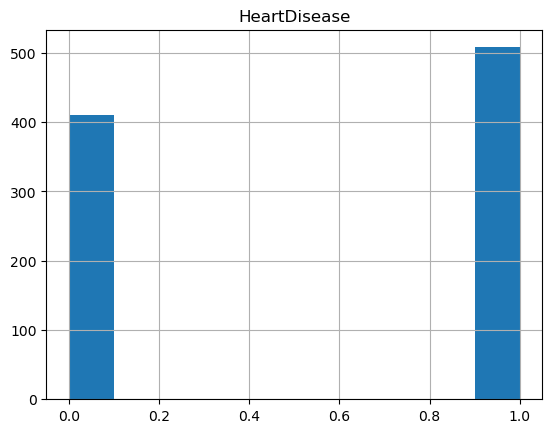

In [14]:
data.hist('HeartDisease')

In [15]:
d = data[data.duplicated()]
d

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [16]:
pd.crosstab(data.Sex,data.HeartDisease)

HeartDisease,0,1
Sex,,
F,143,50
M,267,458


In [17]:
pd.crosstab(data.ExerciseAngina , data.HeartDisease)

HeartDisease,0,1
ExerciseAngina,,
N,355,192
Y,55,316


In [18]:
corre = data.corr()
corre

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<AxesSubplot:>

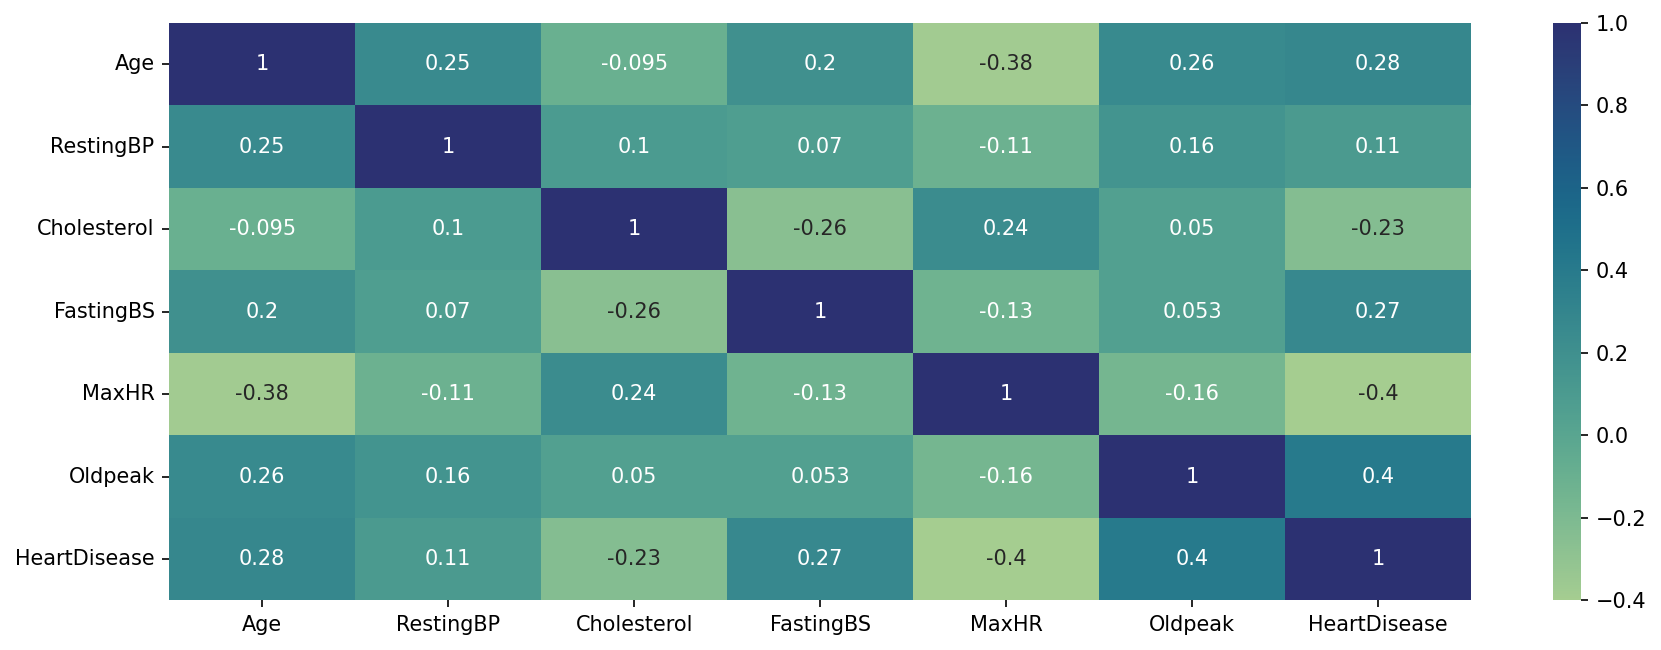

In [19]:
plt.figure(figsize=(14,5),dpi=150)
sns.heatmap(corre , annot = True, cmap="crest")

<module 'matplotlib.pyplot' from 'F:\\anaconda\\anac\\lib\\site-packages\\matplotlib\\pyplot.py'>

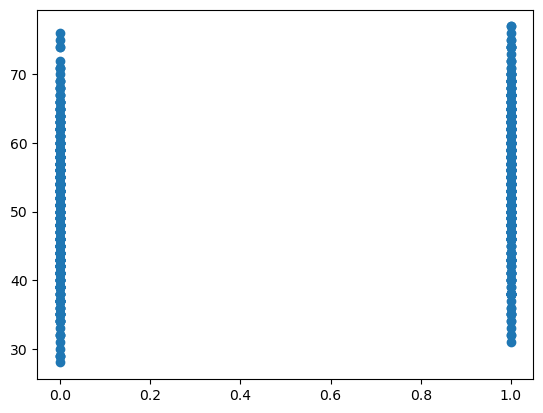

In [20]:
plt.scatter (data['HeartDisease'] , data['Age'])
plt

In [21]:
data= data.drop(columns = ['RestingECG'])

In [22]:
data =  pd.get_dummies(data, drop_first=True)
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,1,0


In [23]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# data['Sex'] = le.fit_transform(data['Sex'])
# # data['RestingECG'] = le.fit_transform(data['RestingECG'])
# data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina'])
# data['ST_Slope'] = le.fit_transform(data['ST_Slope'])
# data['ChestPainType'] = le.fit_transform(data['ChestPainType'])
# data

In [24]:
healthy = data[data['HeartDisease'] == 0]['Age'].values
ill = data[data['HeartDisease'] == 1]['Age'].values
print(pd.DataFrame(healthy))
print (healthy.mean())
print(pd.DataFrame(ill))
print (ill.mean())

      0
0    40
1    37
2    54
3    39
4    45
..   ..
405  56
406  56
407  55
408  41
409  38

[410 rows x 1 columns]
50.551219512195125
      0
0    49
1    48
2    37
3    58
4    49
..   ..
503  57
504  45
505  68
506  57
507  57

[508 rows x 1 columns]
55.8996062992126


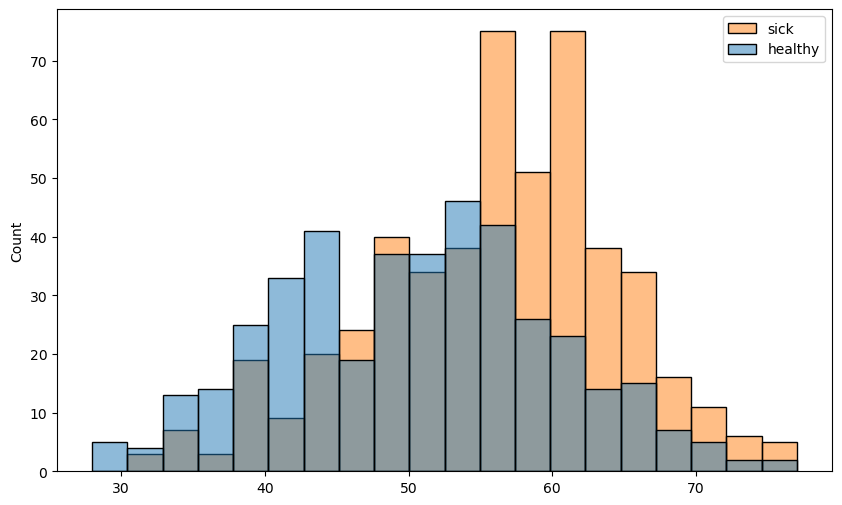

In [25]:
plt.figure(figsize=(10,6))
sns.histplot([healthy, ill], bins = 20)
plt.legend(('sick', 'healthy'))

In [26]:
x = data.drop(columns = ['HeartDisease'])
y = data['HeartDisease']

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures (degree = 3 )
# x = poly.fit_transform(x)

In [28]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.2 ,  random_state = 4 )

In [29]:
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=40)
model.fit(x_train, y_train)
model_test = model.predict(x_test)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

dtc_score = model.score(x_test, y_test)

0.885558583106267
0.8369565217391305


In [30]:
from xgboost import  XGBClassifier
fbst = XGBClassifier(n_estimators = 60, max_depth = 6, learning_rate = 0.001)
fbst.fit(x_train , y_train)
fbst_test = fbst.predict(x_test)
print(fbst.score(x_train, y_train))
print(fbst.score(x_test, y_test))
xgb_score = fbst.score(x_test, y_test)

0.8991825613079019
0.8478260869565217


In [31]:
print(classification_report(y_test, fbst_test))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83        88
           1       0.82      0.91      0.86        96

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [32]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, fbst_test))

[[69 19]
 [ 9 87]]


In [33]:
from sklearn.ensemble import BaggingClassifier
bc =  BaggingClassifier(n_estimators = 70 , max_samples = 5 , random_state =  5 , max_features=7)
bc.fit(x_train , y_train)
bc_test = fbst.predict(x_test)
print (bc.score(x_train , y_train))
print (bc.score(x_test , y_test))
bagc_score = bc.score(x_test , y_test)

0.8433242506811989
0.875


In [34]:
        ### CatBoost Classifier

from catboost import CatBoostClassifier
cbr = CatBoostClassifier(iterations= 400, learning_rate=0.01 , depth=4) 
cbr.fit(x_train , y_train)
cbr_test = cbr.predict(x_test)
print(cbr.score(x_train, y_train))
print(cbr.score(x_test, y_test)) 
cbr_score = cbr.score(x_test, y_test)

0:	learn: 0.6860269	total: 144ms	remaining: 57.4s
1:	learn: 0.6797041	total: 146ms	remaining: 29.1s
2:	learn: 0.6734116	total: 148ms	remaining: 19.6s
3:	learn: 0.6678910	total: 150ms	remaining: 14.9s
4:	learn: 0.6608166	total: 152ms	remaining: 12s
5:	learn: 0.6561323	total: 154ms	remaining: 10.1s
6:	learn: 0.6499619	total: 156ms	remaining: 8.73s
7:	learn: 0.6435367	total: 157ms	remaining: 7.7s
8:	learn: 0.6376382	total: 159ms	remaining: 6.91s
9:	learn: 0.6312696	total: 161ms	remaining: 6.26s
10:	learn: 0.6252684	total: 163ms	remaining: 5.75s
11:	learn: 0.6204083	total: 165ms	remaining: 5.32s
12:	learn: 0.6163210	total: 166ms	remaining: 4.95s
13:	learn: 0.6106491	total: 168ms	remaining: 4.64s
14:	learn: 0.6049720	total: 170ms	remaining: 4.37s
15:	learn: 0.5993973	total: 172ms	remaining: 4.13s
16:	learn: 0.5952247	total: 173ms	remaining: 3.91s
17:	learn: 0.5897308	total: 175ms	remaining: 3.72s
18:	learn: 0.5861420	total: 179ms	remaining: 3.59s
19:	learn: 0.5814995	total: 181ms	remaining:

225:	learn: 0.3166673	total: 529ms	remaining: 407ms
226:	learn: 0.3162365	total: 531ms	remaining: 405ms
227:	learn: 0.3158919	total: 533ms	remaining: 402ms
228:	learn: 0.3155522	total: 534ms	remaining: 399ms
229:	learn: 0.3151777	total: 536ms	remaining: 396ms
230:	learn: 0.3149058	total: 538ms	remaining: 393ms
231:	learn: 0.3145415	total: 539ms	remaining: 391ms
232:	learn: 0.3142881	total: 541ms	remaining: 388ms
233:	learn: 0.3139466	total: 543ms	remaining: 385ms
234:	learn: 0.3137243	total: 544ms	remaining: 382ms
235:	learn: 0.3133895	total: 546ms	remaining: 380ms
236:	learn: 0.3129691	total: 549ms	remaining: 377ms
237:	learn: 0.3125455	total: 551ms	remaining: 375ms
238:	learn: 0.3122487	total: 552ms	remaining: 372ms
239:	learn: 0.3119852	total: 554ms	remaining: 369ms
240:	learn: 0.3117272	total: 556ms	remaining: 367ms
241:	learn: 0.3114942	total: 557ms	remaining: 364ms
242:	learn: 0.3111836	total: 559ms	remaining: 361ms
243:	learn: 0.3108639	total: 561ms	remaining: 358ms
244:	learn: 

In [35]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, cbr_test))

[[74 14]
 [ 5 91]]


In [36]:
print(classification_report(y_test, cbr_test))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        88
           1       0.87      0.95      0.91        96

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184



In [37]:
    ### LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='lsqr', n_components= -1 , tol = 0.0000001) #solver={‘svd’, ‘lsqr’, ‘eigen’}
lda.fit(x_train , y_train)
lda_test = cbr.predict(x_test)
print(lda.score(x_train, y_train))
print(lda.score(x_test, y_test))
lda_score = lda.score(x_test, y_test)

0.8692098092643051
0.8913043478260869


In [38]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, lda_test))

[[74 14]
 [ 5 91]]


In [39]:
    ### QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(reg_param=0.008)
qda.fit (x_train , y_train)
qda_test = cbr.predict(x_test)
print(qda.score(x_train, y_train))
print(qda.score(x_test, y_test)) 
qda_score = qda.score(x_test, y_test)

0.8651226158038147
0.8152173913043478


In [40]:
### support vector classifier
from sklearn.svm import SVC
svc= SVC(kernel = 'rbf' , gamma ='auto' ) 
svc.fit(x_train , y_train)
svc_test = cbr.predict(x_test)
print(svc.score(x_train, y_train))
print(svc.score(x_test, y_test))
svc_score = svc.score(x_test, y_test)

0.9046321525885559
0.9021739130434783


In [41]:
print(classification_report(y_test, svc_test))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        88
           1       0.87      0.95      0.91        96

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184



In [42]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 2400, max_depth= 6)
rfc.fit(x_train , y_train)
rf_test = cbr.predict(x_test)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))
RF_score = rfc.score(x_test, y_test)

0.9168937329700273
0.907608695652174


In [43]:
print(classification_report(y_test, rf_test))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        88
           1       0.87      0.95      0.91        96

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184



In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 91 , weights='uniform', algorithm='kd_tree')
##  weights= {'distance' , 'uniform'}  algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
knn.fit(x_train , y_train)
print ("knn train accu = " , knn.score(x_train , y_train ))
print ("knn test accu = " , knn.score(x_test , y_test ))
knn_score = knn.score(x_test , y_test )
knn_test = cbr.predict(x_test)
print(classification_report(y_test, knn_test))

knn train accu =  0.8692098092643051
knn test accu =  0.9130434782608695
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        88
           1       0.87      0.95      0.91        96

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184



F:\anaconda\anac\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
F:\anaconda\anac\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

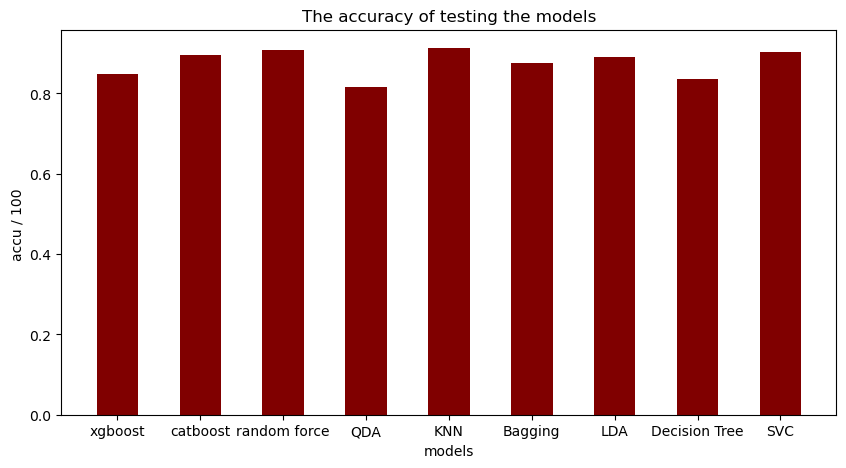

,names,value
0,xgboost,0.847826
1,catboost,0.896739
2,random force,0.907609
3,QDA,0.815217
4,KNN,0.913043
5,Bagging,0.875000
6,LDA,0.891304
7,Decision Tree,0.836957
8,SVC,0.902174


In [45]:
val = {'xgboost':xgb_score, 'catboost':cbr_score, 'random force':RF_score, 'QDA' : qda_score,
       'KNN':knn_score , 'Bagging': bagc_score , 'LDA' :lda_score ,'Decision Tree': dtc_score , 'SVC' : svc_score }
courses = list(val.keys())
values = list(val.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon', width = 0.5)
 
plt.xlabel("models")
plt.ylabel("accu / 100 ")
plt.title("The accuracy of testing the models")
plt.show()

df =  {'names' : ['xgboost' , 'catboost' , 'random force' ,'QDA', 'KNN' ,'Bagging', 'LDA' , 'Decision Tree' , 'SVC'],
        'value' : [ xgb_score , cbr_score , RF_score , qda_score, knn_score , bagc_score , lda_score , dtc_score ,svc_score ]}
pd.DataFrame(df)